In [1]:
# TODO: monophony unison and polyphony distinct.
# Update the legend.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline

## Read the data

In [3]:
modal_profiles = pd.read_csv('./output/modal_profiles.csv')

x,y = ([] for i in range(2))
for i, row in modal_profiles['lat'].iteritems():
    try:
        if row =='19,27':
            y.append(19.27)
        elif row == ' ':
            y.append(40.7410861)
        else:
            y.append(float(row))
    except ValueError as e:
        print(i, e)
for i, row in modal_profiles['lng'].iteritems():
    x.append(float(row))

In [4]:
modal_profiles = modal_profiles.drop(columns=["Unnamed: 0"])

In [5]:
line_metadata =  pd.read_csv('./data/line_metadata.csv')
line_metadata = line_metadata.drop(columns='linenum')

## Plot the data

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
def plot_map(linenum, vname):
    column_name = 'cv_'+str(linenum)
    line_title = 'Cantometrics Line '+str(linenum)
    variable_name = vname
    filename = './figs/'+vname.lower()+'.png'

    fig = plt.figure(figsize=(30,15))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines(alpha=.5, color="#B4B4B4")
    ax.text(-175, -70, line_title, fontsize=42, fontfamily="Roboto", color="Black")
    ax.text(-175, -78, variable_name, fontsize=28, fontfamily="Roboto", color="Black")
    scatter = ax.scatter(x,  y,
               c=modal_profiles[column_name], 
               cmap="coolwarm_r", 
               alpha=1,
               marker='o')
    ax.add_feature(cfeature.OCEAN, alpha=.6, color="#C0E0E6") 
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Legend")
    ax.add_artist(legend1)
    plt.savefig(filename)

## Plot nasality and Vocal Width

In [8]:
# line 33 is Vocal Width, line 34 is Nasality. 
# This is index 32 and 33 resp because of array indexing
print(line_metadata.loc[32]['varname'],'and',line_metadata.loc[33]['varname'])

Vocal Width and Nasality


In [9]:
vocal_width = [int(round(row)) for i, row in enumerate(modal_profiles['cv_33'])]
nasality = [int(round(row)) for i, row in enumerate(modal_profiles['cv_34'])]

In [27]:
encoding = []
for i in range(len(vocal_width)):
    if vocal_width[i]==1:
        #wide vocal width
        if nasality[i]==1:
            #low nasality
            encoding.append(1)
        else:
            #high nasality
            encoding.append(2)
    else:
        #narrow vocal width
        if nasality[i]==1:
            #low nasality
            encoding.append(3)
        else:
            #high nasality
            encoding.append(4)

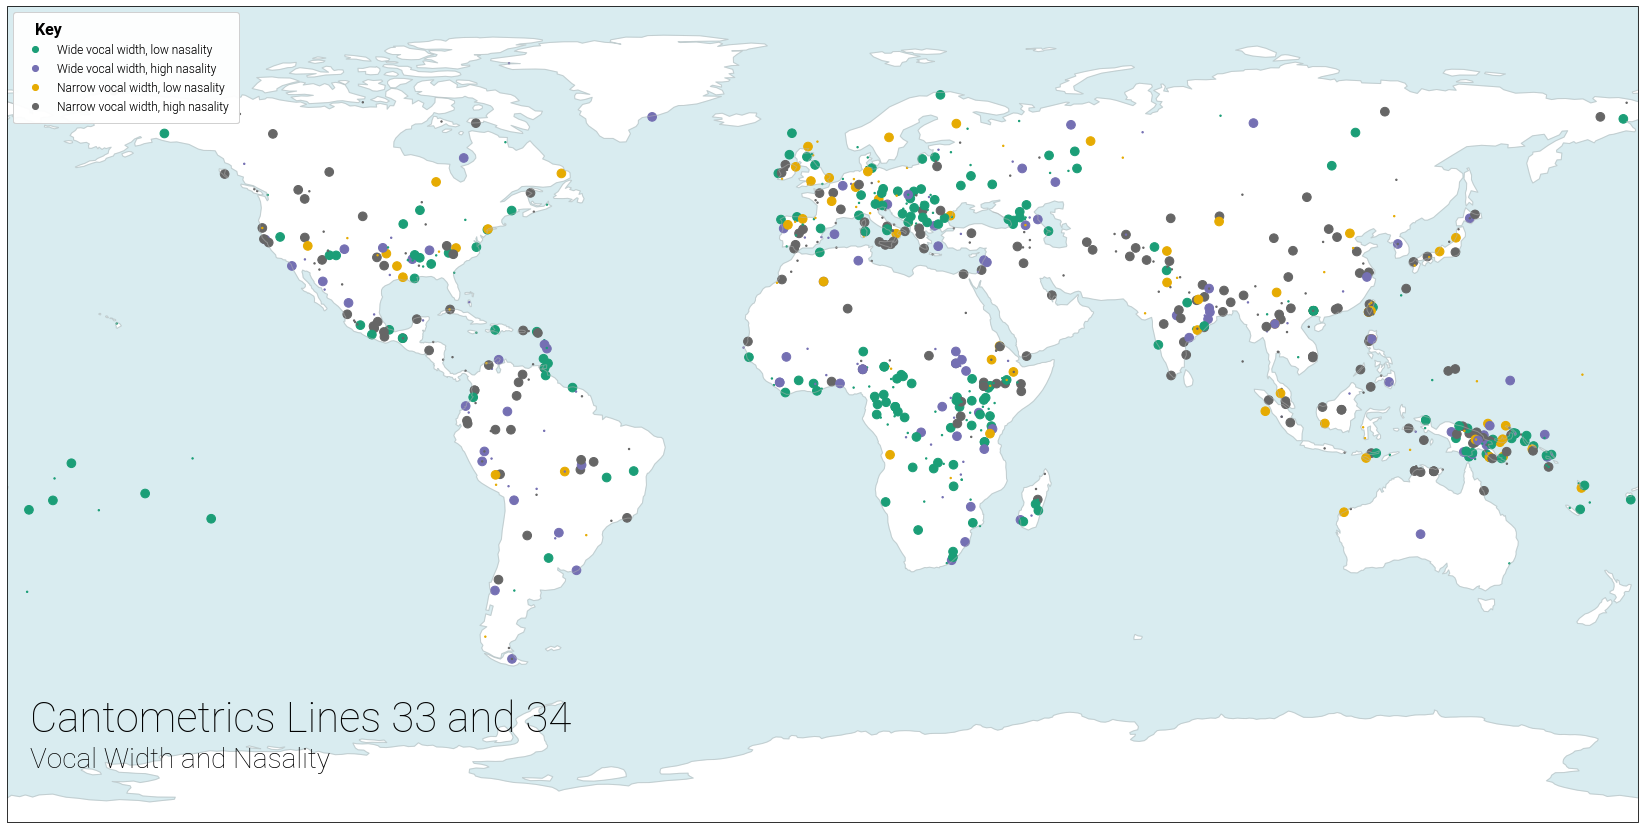

In [54]:
line_title = 'Cantometrics Lines 33 and 34'
variable_name = line_metadata.loc[32]['varname']+' and '+line_metadata.loc[33]['varname']
filename = './figs/vocal_width_nasality.png'

fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.text(-175, -70, line_title, fontsize=42, fontfamily="Roboto", color="Black")
ax.text(-175, -78, variable_name, fontsize=28, fontfamily="Roboto", color="Black")
scatter = ax.scatter(x,  y,
           c=encoding, 
           cmap="Dark2", 
           alpha=1,
           marker='o', sizes=(2,75))
ax.add_feature(cfeature.OCEAN, alpha=.6, color="#C0E0E6") 

light = font_manager.FontProperties(family='Roboto',
                                   weight='light',
                                   style='normal', size=12)

bold = font_manager.FontProperties(family='Roboto',
                                   weight='bold',
                                   style='normal', size=16)

legend = ax.legend(*scatter.legend_elements(), prop=light,
                    loc="upper left")
legend.set_title("   Key", prop=bold)
legend.get_texts()[0].set_text('Wide vocal width, low nasality')
legend.get_texts()[1].set_text('Wide vocal width, high nasality')
legend.get_texts()[2].set_text('Narrow vocal width, low nasality')
legend.get_texts()[3].set_text('Narrow vocal width, high nasality')

legend._legend_box.align = "left"
legend._legend_box.pad = 10
ax.add_artist(legend)
plt.savefig(filename)

Text(0, 0, 'Legend')

Text(0, 0, 'Narrow vocal width, high nasality')